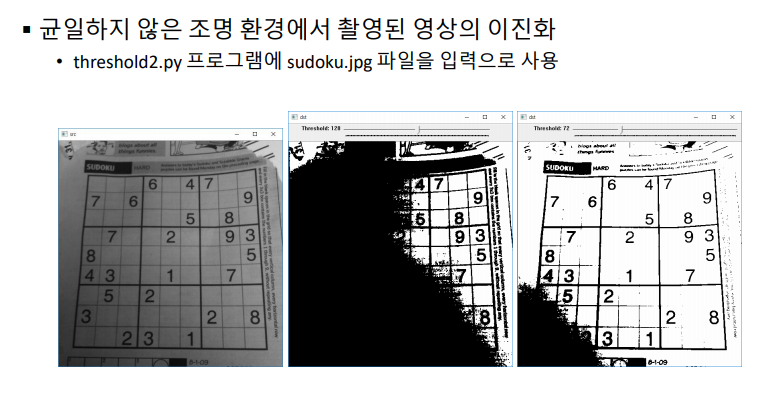  
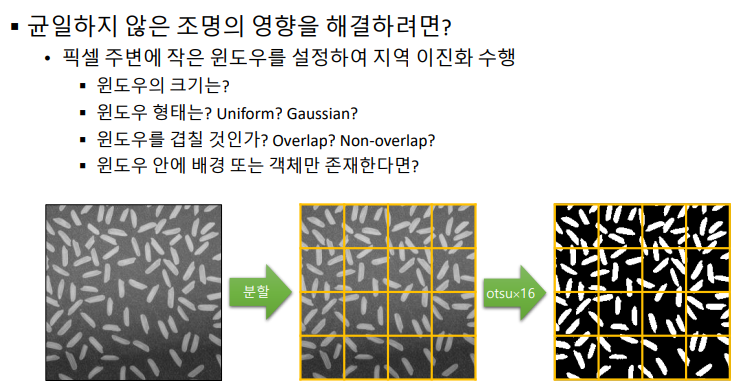

In [1]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt

!pip install opencv-python

In [2]:
src=cv2.imread('rice.png',cv2.IMREAD_GRAYSCALE)

In [3]:
if src is None:

    print('Image load failed!')

    sys.exit()

In [4]:
_, dst1 = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

In [5]:
dst2 = np.zeros(src.shape, np.uint8)

Block Width인 512를 4로 나누어 줍니다.

In [6]:
bw = src.shape[1] // 4

Block Height인 512를 4로 나누어 줍니다.

In [8]:
bh = src.shape[0] // 4

0 ~ 첫번째 블럭까지 Width,Height를 각각 지역 이진화 해줍니다. 0~3이며 4는 포함하지 않습니다. threshold의 마지막 인자는 dst_인데, 이것은 입력이자 출력으로 받습니다. 그렇지 않으면 전의 정보를 잊어버리기 때문이죠. dst_는 블럭일 뿐입니다.

In [9]:
for y in range(4):

    for x in range(4):

        src_ = src[y*bh:(y+1)*bh, x*bw:(x+1)*bw] #사이즈 주는 파라미터용도

        dst_ = dst2[y*bh:(y+1)*bh, x*bw:(x+1)*bw]

        cv2.threshold(src_, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU, dst_)

(<AxesSubplot:>,
 (0.0, 1.0, 0.0, 1.0),
 <matplotlib.image.AxesImage at 0x219632270d0>)

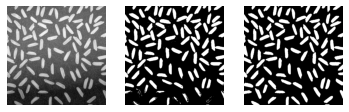

In [11]:
plt.subplot(131),plt.axis('off'),plt.imshow(src,cmap='gray')
plt.subplot(132),plt.axis('off'),plt.imshow(dst1,cmap='gray')
plt.subplot(133),plt.axis('off'),plt.imshow(dst2,cmap='gray')

In [12]:
cv2.imshow('src', src)

cv2.imshow('dst1', dst1)

cv2.imshow('dst2', dst2)

cv2.waitKey()

cv2.destroyAllWindows()